# <font color='Blue'>EDA case study.</font>
   
   <b><font color='Green'>by Saurabh Vyawahare and Lakshit Aswal</font>

    



- ## Introduction

  In this notebook, we have mainly focused on analysing the previous data of bank loan applicant.
  This dataset contains their information with their previous loan details.

- ## Approach

  For the Exploratory data analysis, mentioned steps have been followed.
  
  - Import Modules
  - Read dataset
  - Data cleaning
  - Univariate Analysis
  - Bivariate and Multivariate Analysis

## Importing the modules

In [61]:
#for avioding the warnings
import warnings
warnings.filterwarnings("ignore")

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
application_df = pd.read_csv("C:/Users/saura/Downloads/application_data.csv")
prev_ap_df = pd.read_csv("C:/Users/saura/Downloads/previous_application.csv")

#### Checking first five rows of data.
   we are using .head() function in pandas which will show us first five rows of both dataset.

In [64]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking number of features and their datatype in both dataframe.
   we are using .info() function in pandas which will show us number of features and their datatypes.

In [66]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [67]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [68]:
# printing shape of both datasets.
print(application_df.shape)

print(prev_ap_df.shape)


(307511, 122)
(1670214, 37)


### <font color="Green"> Inference -</font>

   - prev_ap_df contains 37 features and 1670214 rows.<br>
     (Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

   - application_df contains 121 features, 1 target variable, and 307511 rows.<br>
     (Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)
     
   - previous_application Dataset contains more number of rows than application_data Dataset.

In [69]:

# Additional columns and common columns in application_df and prev_ap_df
additional_feat = []
common_feat = []

for col in application_df.columns:
    if col not in prev_ap_df.columns:
        additional_feat.append(col)
    else:
        common_feat.append(col)
        
print(len(additional_feat))
print(len(common_feat))
print(common_feat)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


- ## Data Cleaning

In [70]:
# Function_name : missingdata_percentage
# Usage : Returns % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and % of missing values in those categories

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [71]:
missingdata_prev = missingdata_percentage(prev_ap_df)

In [72]:
missingdata_prev.sort_values('percentage', ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.636480
4,RATE_DOWN_PAYMENT,53.636480
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


### <font color="Green"> Inference -</font>
   - There are 16 features in prev_app_df that have missing values.
   - from the above mssing value data we can Permanently dropping the features (RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED) as 99% data is missing.

In [73]:
prev_ap_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_ap_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
prev_ap_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [74]:
# Extracting the numeric features from previous application data

numeric_features = []
for col in prev_ap_df.columns:
    if prev_ap_df[col].dtype == float or prev_ap_df[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [75]:
prev_num_df = pd.DataFrame()

for col in numeric_features:
    prev_num_df[col] = prev_ap_df[col]
    
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

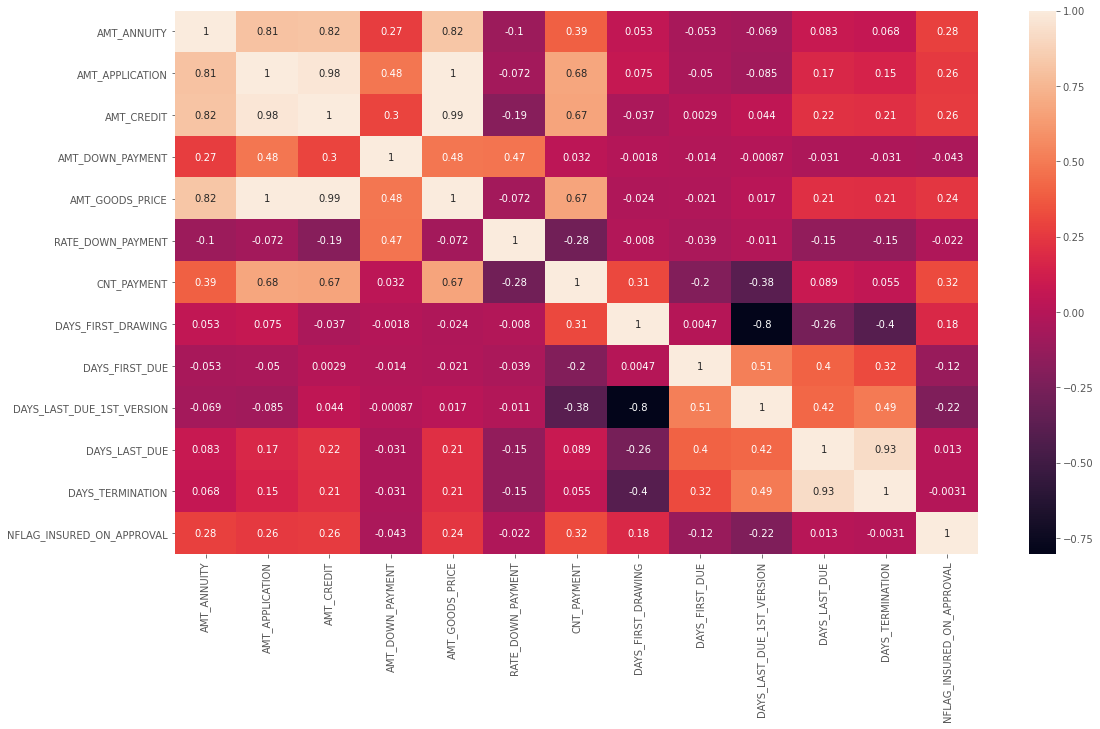

In [76]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(prev_num_df.corr(), annot=True)
plt.show()

### <font color="Green"> Inference -</font>
  - 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated because they are showing constant value 1 on the plot.
  - 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation.
  - 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated.

In [77]:
prev_ap_df.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [78]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

In [79]:
print(prev_ap_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [80]:
# Filling missing value as 'Unaccompanied' as most common value

prev_ap_df['NAME_TYPE_SUITE'].fillna(prev_ap_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [81]:
# Merging only required columns of application_data with previous_application_data

prev_ap_merged = pd.merge(application_df[['SK_ID_CURR', 'TARGET']], prev_ap_df, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [82]:
# Checking on the numeric data

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.429841e+06,1.429841e+06,1.106482e+06,1.413387e+06,1.413387e+06,6.641610e+05,1.094176e+06,1.413387e+06,1.413387e+06,664161.000000,1.413387e+06,1.413387e+06,1.106487e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784721e+05,8.621658e-02,1.583720e+04,1.752825e+05,1.963976e+05,6.655317e+03,2.264512e+05,1.247888e+01,9.964313e-01,0.080175,-8.804742e+02,3.150476e+02,1.605195e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028026e+05,2.806837e-01,1.472491e+04,2.936432e+05,3.195033e+05,2.062030e+04,3.159376e+05,3.331533e+00,5.963220e-02,0.107784,7.835932e+02,7.695935e+03,1.456674e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,6.257880e+03,1.975500e+04,2.491200e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.314000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789590e+05,0.000000e+00,1.122376e+04,7.090200e+04,8.064000e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675110e+05,0.000000e+00,2.042111e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- ## Handling the outliners

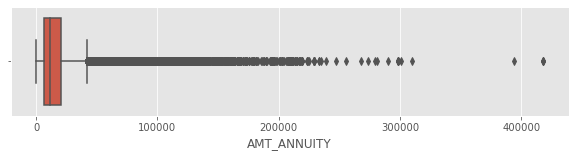

In [83]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

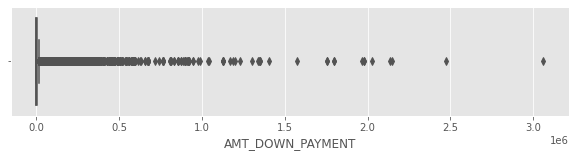

In [84]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [85]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'], 99)]

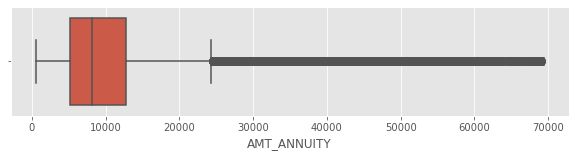

In [86]:
# Checking the features after updating.

plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

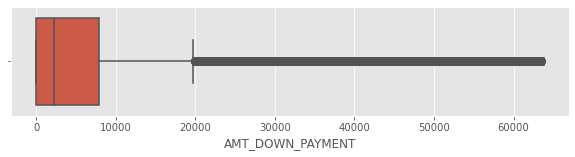

In [87]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

- ## Checking Data Imbalance.

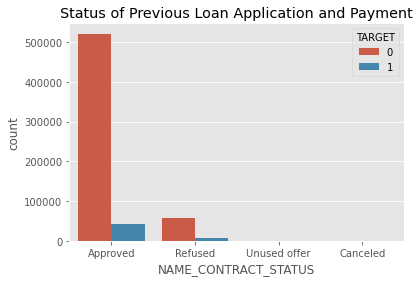

In [88]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])
plt.show()

In [89]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.354523610066182


In [90]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.18283846699349


### <font color="Green"> Inference -</font>

  - The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

  - 7% of the previously approved loan applicants that defaulted in current loan

  - 90 % of the previously refused loan applicants that were able to pay current loan

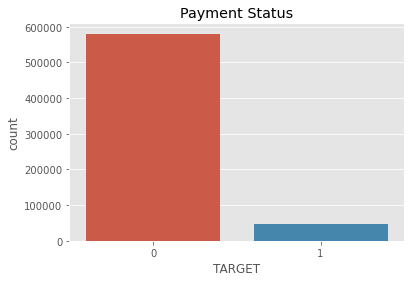

In [91]:
plt.title("Payment Status")
sns.countplot(prev_ap_merged['TARGET'])
plt.show()

### <font color="Green"> Inference -</font>

  - As you can see this data is highly imbalanced as number of defaulter is very less in total population denoted by red and blue bar graph.

- ## Univariate, Bivariate and Multivariate Analysis

In [92]:
print(prev_ap_merged.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(prev_ap_merged.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    628193
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1.0    627967
0.0       226
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


### <font color="Green"> Inference -</font>

  - 'FLAG_LAST_APPL_PER_CONTRACT' can be dropped from the data for having fixed value in all entries.

  - 'NFLAG_LAST_APPL_IN_DAY' can be dropped from the data for having highly imbalance data.

- ## Analysis of Numeric Features of Previous Application Data

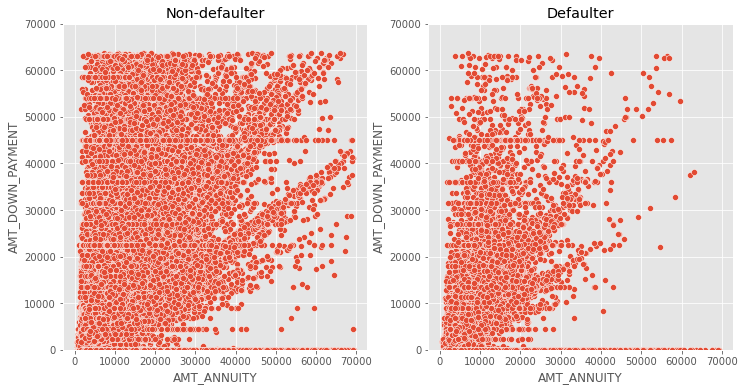

In [93]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()


### <font color="Green"> Inference -</font>

  - If you see the data insights for down payment , the defaulter cases are much less.
  - Number of defaulters are less found in previous application data for larger amount of annuity. 

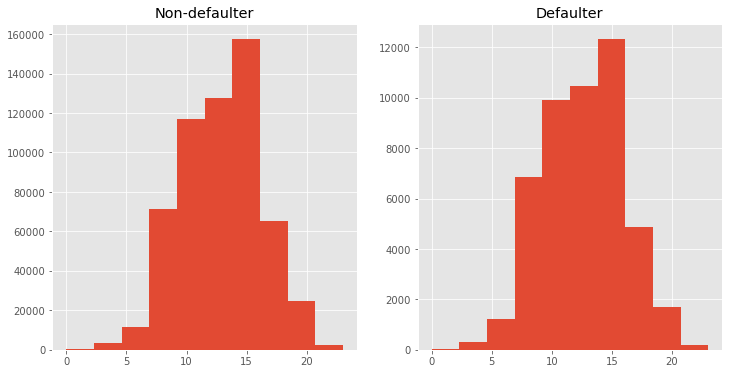

In [94]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

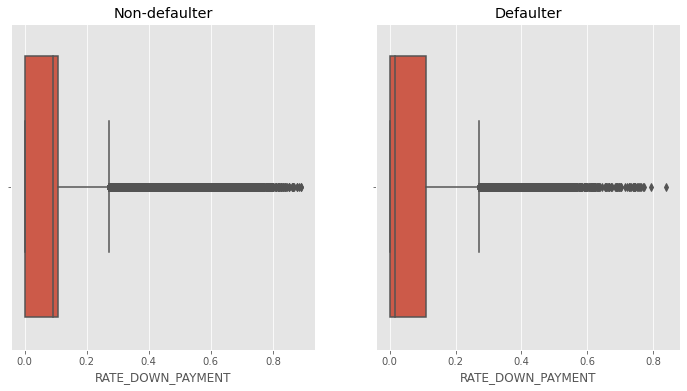

In [95]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'], ax=ax2)

plt.show()


In [96]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.091255
0.70    0.108909
0.90    0.211895
0.95    0.282832
0.99    0.498074
Name: RATE_DOWN_PAYMENT, dtype: float64

In [97]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])


0.50    0.017238
0.70    0.104260
0.90    0.199685
0.95    0.232643
0.99    0.454294
Name: RATE_DOWN_PAYMENT, dtype: float64

### <font color="Green"> Inference -</font>

  - For those who had lower rate of down payment in previous application, cases of default are higher.

- ## Analysis of Categorical Features of Previous Application Data

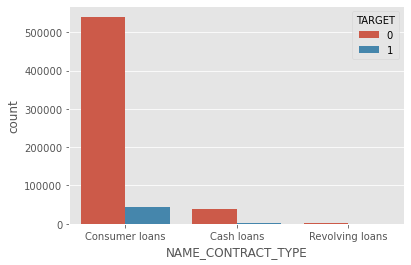

In [98]:
sns.countplot(prev_ap_merged.NAME_CONTRACT_TYPE, hue=prev_ap_merged.TARGET)
plt.show()

### <font color="Green"> Inference -</font>

  - Highest number of loans are applied for Consumer Loans

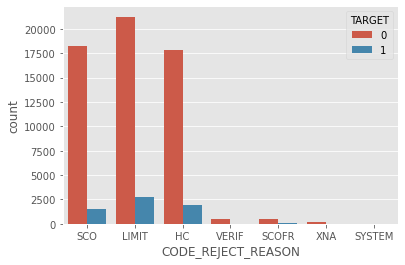

In [99]:
sns.countplot(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=prev_ap_merged.TARGET)
plt.show()

### <font color="Green"> Inference -</font>

  - As you can see in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection for the loan application.

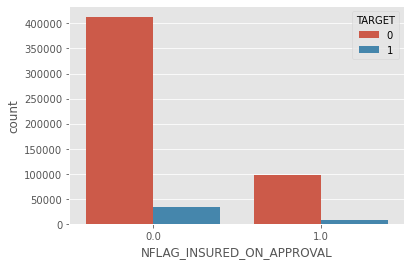

In [100]:
sns.countplot(prev_ap_merged['NFLAG_INSURED_ON_APPROVAL'], hue=prev_ap_merged['TARGET'])
plt.show()

### <font color="Green"> Inference -</font>

  - Most of the people did not request insurance during previous loan application.

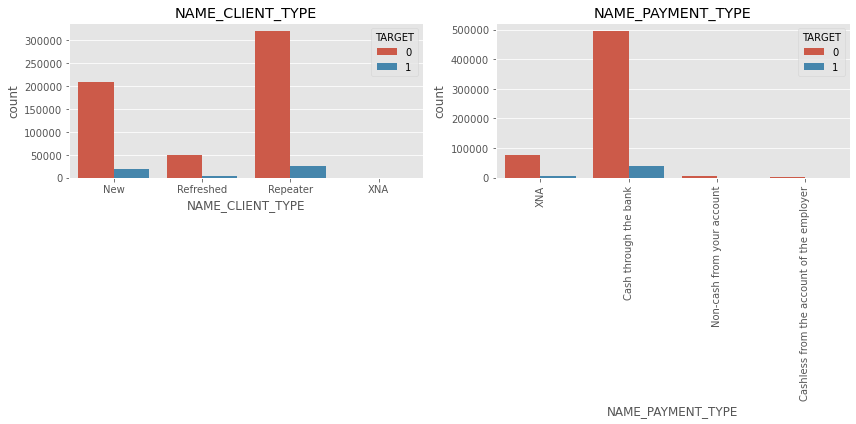

In [101]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(prev_ap_merged['NAME_CLIENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(prev_ap_merged['NAME_PAYMENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

### <font color="Green"> Inference -</font>

  - Most of the applicants are repeater and also Cash through the bank is the most frequently used payment method.

In [102]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [103]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_GOODS_CATEGORY')


,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.257410
14,Jewelry,9.124951
17,Auto Accessories,9.029763
3,Mobile,8.615336
15,Office Appliances,8.307692
8,Computers,8.074335
20,Weapon,8.064516
21,Direct Sales,8.024691
5,Audio/Video,7.698706


In [104]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PORTFOLIO')


,Value,Percentage of Defaulter
2,Cards,17.119695
0,POS,7.666139
1,Cash,6.384448
3,Cars,0.000000


In [105]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.165550
0,XNA,7.665995
2,x-sell,6.036420


In [106]:
value_wise_defaulter_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),15.000000
1,Country-wide,7.908171
2,Regional / Local,7.551291
0,Stone,7.294692
3,Credit and cash offices,6.124197
5,Contact center,4.545455
6,Car dealer,0.000000


In [107]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.522088
9,Jewelry,9.019221
3,Connectivity,8.780637
2,Consumer electronics,7.451983
7,Industry,7.211664
4,Construction,6.597424
5,XNA,6.226598
1,Furniture,5.924492
6,Clothing,5.857399
8,Tourism,4.778157


In [108]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
4,XNA,17.119695
2,high,8.340935
1,middle,7.558098
0,low_normal,6.844973
3,low_action,6.608936


In [109]:
value_wise_defaulter_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
13,Card Street,17.195005
4,POS mobile with interest,8.761056
0,POS other with interest,7.953141
3,POS mobile without interest,7.888514
2,POS household with interest,7.752151
11,POS others without interest,7.256127
15,Card X-Sell,6.666667
5,POS household without interest,6.649376
9,Cash Street: middle,6.475391
10,Cash Street: high,6.417625


### <font color="Green"> Inference -</font>

  Now we will discuss the data collected from different value wise defaulter as shown above.
  
   - From name goods category we can see that Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles.
   
   - Similerly from name portfolio we can say that Cards defaulter rate is highest.
   
   - From name product type all the walk-in applicants 9% defaulted in current loan.
   
   - 15% loan applicatiant defaulted for AP+ (Cash Loan) this insight is from channel type.
   
   - From seller industry we can say that In seller Industry "Auto technology" has highest rate of defaulter and MLM partners has lowest number of defaulters
   
   - Defaulter percentage is highest where NAME_YIELD_GROUP is not known.
   
   - Finally we found that highest percentage of default cases is for Card Street.
   

- ## <font color="Green">Conclusion.</font>

 - ### Insights about given dataset.
 
    1. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.
    
    2. Feature columns with 50% or more missing data can be dropped.
    
 - ### Recommended step for given dataset.
 
     1. Following columns should be converted to integer. DAYS_FIRST_DRAWING float64 DAYS_FIRST_DUE float64 DAYS_LAST_DUE_1ST_VERSION float64 DAYS_LAST_DUE float64 DAYS_TERMINATION float64.
     
     2. We can covert this NFLAG_INSURED_ON_APPROVAL float64 column into interger column because it contains only 0 and 1.
     
 - ### Details of different value wise defaulters and important features.
     1. We can see that 7% of the previously approved loan applicants that defaulted in current loan.
     
     2. Total 90 % of the previously refused loan applicants that were able to pay current loan.
     
     3. the most common reason of rejection are 'SCO', 'LIMIT' and 'HC'.

     4. Most of the people did not request insurance during previous loan application.

     5. For "Cards" defaulter percentage is highest (17%). 'NAME_PORTFOLIO' is an important feature for analyzing 'TARGET' variable.

     6. 15% loan applicatiant defaulted for AP+ (Cash Loan). 'CHANNEL_TYPE' is an important feature for analyzing 'TARGET' variable.

     7. Highest percentage (17%) of default cases is for 'Card Street'.